In [12]:
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset
import sklearn.metrics as metrics
import scipy.sparse as sparse
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading


In [4]:
y_train.todense()

matrix([[0, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 1],
        ...,
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0],
        [0, 1, 1, 0, 0, 0]])

In [5]:
label_kind=np.unique(y_train.todense(),axis=0)
np.shape(label_kind)

(26, 6)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.cluster import MatrixLabelSpaceClusterer
from skmultilearn.ensemble import LabelSpacePartitioningClassifier

# construct base forest classifier
base_classifier = RandomForestClassifier(n_estimators=1030)

# setup problem transformation approach with sparse matrices for random forest
problem_transform_classifier = LabelPowerset(classifier=base_classifier,
    require_dense=[False, False])

# setup the clusterer
clusterer = MatrixLabelSpaceClusterer(clusterer=KMeans(n_clusters=3))

# setup the ensemble metaclassifier
classifier = LabelSpacePartitioningClassifier(problem_transform_classifier, clusterer)

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

/Users/phl/Library/Python/3.8/lib/python/site-packages/skmultilearn/cluster/matrix.py:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(_membership_to_list_of_communities(result, 1 + max(result)))


In [7]:
def trans_result(y_testing, pred):
    col_count = y_testing.shape[1]
    y_test_df = pd.DataFrame(y_testing.todense(),columns=[label_names[x][0] for x in range(col_count)])
    pred_df = pd.DataFrame(pred.todense(),columns=[label_names[x][0] for x in range(col_count)])
    z=[]
    for col in y_test_df.columns:
        z.append({"name": col,
              "precision": metrics.precision_score(y_test_df[col], pred_df[col]),
              "recall": metrics.recall_score(y_test_df[col], pred_df[col]),
              "accuracy": metrics.accuracy_score(y_test_df[col], pred_df[col]),
              "f1": metrics.f1_score(y_test_df[col], pred_df[col])})
    return pd.DataFrame(z)

In [8]:
result_df = trans_result(y_test,predictions)
result_df

,name,precision,recall,accuracy,f1
0,amazed-suprised,0.725000,0.537037,0.821782,0.617021
1,happy-pleased,0.850000,0.288136,0.777228,0.430380
2,relaxing-calm,0.704545,0.645833,0.702970,0.673913
3,quiet-still,0.891304,0.694915,0.886139,0.780952
4,sad-lonely,0.925000,0.506849,0.806931,0.654867
5,angry-aggresive,0.844444,0.655172,0.866337,0.737864


In [9]:
from sklearn.cluster import KMeans

data_set = pd.DataFrame(y_train.todense(),columns=[label_names[x][0] for x in range(y_train.shape[1])])

estimator = KMeans(n_clusters=3)
estimator.fit(data_set)

r = pd.concat([data_set, pd.Series(estimator.labels_, index=data_set.index)], axis=1)
r.columns = list(data_set.columns) + ["cluster"]

In [10]:
from sklearn.manifold import TSNE

t_sne = TSNE()
t_sne.fit(data_set)
t_sne = pd.DataFrame(t_sne.embedding_, index=data_set.index)
t_sne.columns=["v1","v2"]
t_sne["group"]=estimator.labels_

<AxesSubplot:xlabel='v1', ylabel='v2'>

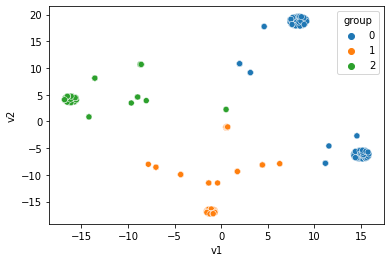

In [11]:
sns.scatterplot(data=t_sne, x="v1", y="v2",hue="group",palette="tab10")

In [46]:
X_train, y_train, feature_names, label_names = load_dataset('CAL500', 'train')

ValueError: The set CAL500 in variant train does not exist on server.

提供 label space cluster 信息